In [1]:
root="/content/drive/MyDrive/DL" #setting working directory

In [2]:
import os

In [3]:
os.chdir(root)

In [4]:
os.getcwd()

'/content/drive/MyDrive/DL'

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import joblib
import pandas as pd
import pickle


In [6]:
class perceptron:
 def __init__(self,eta,epochs,activationFunction):
   self.weights=np.random.randn(3)*1e-4 #initialising weights randomly
   self.eta=eta
   self.epochs=epochs
   self.activationFunction=activationFunction
 def fit(self,X,Y):
   self.X=X
   self.Y=Y
   X_with_bias=np.c_[self.X,-np.ones((len(self.X),1))]#concatenating bias value(-1) with the input
   for epoch in range(self.epochs):
     Z=np.dot(X_with_bias,self.weights)
     y_hat=self.activationFunction(Z)
     error=self.Y-y_hat
     self.weights=self.weights+np.dot(X_with_bias.T,error)*self.eta
     print("epoch  {} : weights {}".format(epoch+1,self.weights))
 def predict(self,X):
     X_with_bias=np.c_[X,-np.ones((len(X),1))]
     self.y_pred=np.dot(X_with_bias,self.weights)
     return activationFunction(self.y_pred)
     




In [7]:
activationFunction=lambda Z:np.where(Z>0,1,0)#step function as activation function

Dataset for AND Gate

In [8]:
data={"x1":[0,0,1,1],"x2":[0,1,0,1],"y":[0,0,0,1]}

In [9]:
data=pd.DataFrame(data)

In [10]:
data

,x1,x2,y
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1


In [11]:
X=data.drop("y",axis=1)
Y=data["y"]


In [12]:
model = perceptron(eta=.001,epochs= 10,activationFunction=activationFunction)
model.fit(X,Y)

epoch  1 : weights [8.87622233e-04 9.14282354e-06 9.87354339e-04]
epoch  2 : weights [ 1.88762223e-03  1.00914282e-03 -1.26456614e-05]
epoch  3 : weights [8.87622233e-04 9.14282354e-06 2.98735434e-03]
epoch  4 : weights [0.00188762 0.00100914 0.00198735]
epoch  5 : weights [0.00188762 0.00100914 0.00198735]
epoch  6 : weights [0.00188762 0.00100914 0.00198735]
epoch  7 : weights [0.00188762 0.00100914 0.00198735]
epoch  8 : weights [0.00188762 0.00100914 0.00198735]
epoch  9 : weights [0.00188762 0.00100914 0.00198735]
epoch  10 : weights [0.00188762 0.00100914 0.00198735]


In [13]:
model.predict(X)

array([0, 0, 0, 1])

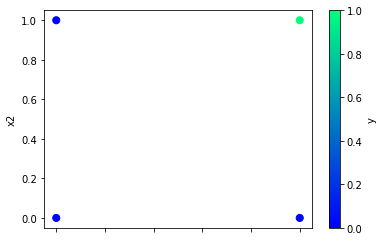

In [18]:
data.plot(kind="scatter",x="x1",y="x2",c="y",s=50,cmap="winter")
